<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_4_Style_Transfer_with_Tensorflow_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style Transfer with Tensorflow 2.0 

Vous pensiez que les ordinateurs n'étaient pas des artistes, nous allons vous montrer l'inverse ! Nous allons implémenter ce qu'on appelle le _Neural Style Transfer_ qui permet de prendre deux images et de les mélanger pour créer un effet de style très _Kandinsky_. Voici ce à quoi nous allons arriver à la fin de notre projet : 

![Texte alternatif…](https://tensorflow.org/beta/tutorials/generative/images/kadinsky-turtle.png)

* Importez les librairies suivantes : 
  * Tensorflow 2.0 ---> Nous permettra de gérer les modèles et le preprocessing
  * Matplotlib.pyplot ---> Nous permettra aussi de visualiser des images
  * Numpy ---> Nous permettra d'effectuer du preprocessing 
  * Time ---> Nous permettra de regarder combien de temps prend l'entrainement du modèle 

In [0]:
!pip install tensorflow-gpu==2.0.0beta1
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import time 

     |████████████████████████████████| 348.9MB 46kB/s 
     |████████████████████████████████| 501kB 47.2MB/s 
     |████████████████████████████████| 3.1MB 31.0MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

* En utilisant [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) importez les deux images suivantes : 
  * Turtle : `https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg`
  * Kandinsky : `https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg`

In [0]:
content_path = tf.keras.utils.get_file('turtle.jpg',
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg',
                                       cache_subdir="/content")

content_path = tf.keras.utils.get_file('kandinsky.jpg',
                                       'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg',
                                       cache_subdir="/content")

196608/195196 [==============================] - 0s 0us/step


* Nous voudrions harmoniser la taille des deux images ainsi que les transformer en tenseurs. Utilisez les méthodes ci-dessus pour parvenir à vos fins : 
  * [`tf.io.read_file()`](https://www.tensorflow.org/api_docs/python/tf/io/read_file)
  * [`tf.image.decode_image`](https://www.tensorflow.org/api_docs/python/tf/io/decode_image)
  * [`tf.image.resize()`](https://www.tensorflow.org/api_docs/python/tf/image/resize_images)
  
Attention : Vous aurez besoin de prendre en considération deux choses. La première est qu'il vous faudra convertir les pixels en `tf.float64` si vous voulez que votre `tf.image.resize()` fonctionne. La seconde chose est qu'un modèle prend en compte un shape (batch_size, height, width, channels), vous devrez donc changer la shape de votre tenseur via [`tf.newaxis`](https://www.tensorflow.org/api_docs/python/tf#newaxis)
  
BONUS : Créez une fonction qui vous permettra d'éviter de vous répéter pour chacune des deux images 
  

In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, tf.Variable([384, 512]))
  img = img[tf.newaxis, :]
  
  return img

style_image = load_img("kandinsky.jpg")
content_image = load_img("turtle.jpg")

print(content_image, style_image)

tf.Tensor(
[[[[0.         0.38431376 0.48235297]
   [0.         0.38431376 0.48235297]
   [0.         0.38823533 0.48627454]
   ...
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]]

  [[0.         0.38431376 0.48235297]
   [0.         0.38823533 0.48627454]
   [0.         0.38823533 0.48627454]
   ...
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]]

  [[0.         0.38823533 0.48627454]
   [0.         0.38823533 0.48627454]
   [0.         0.3921569  0.4901961 ]
   ...
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]
   [0.00392157 0.41176474 0.5176471 ]]

  ...

  [[0.86666673 0.7411765  0.8000001 ]
   [0.9686275  0.8588236  0.80392164]
   [0.9490197  0.87843144 0.59607846]
   ...
   [0.49803925 0.49803925 0.39607847]
   [0.49411768 0.49411768 0.3921569 ]
   [0.49411768 0.49411768 0.3921569 ]]

  [[0.94117653 0.8078432  0.862745

* Visualisez les deux images via matplotlib. 

NB : Vous aurez surement besoin d'utiliser [`tf.squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze)

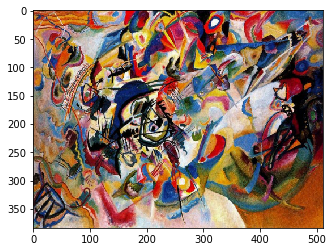

In [0]:
# Visualisatin de Kandinsky 
plt.imshow(tf.squeeze(style_image))

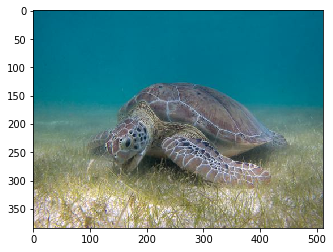

In [0]:
# Visualisation de la tortue
plt.imshow(tf.squeeze(content_image))

* Pour créer une image qui va mélanger le style de deux images, nous allons devoir couper un modèle pré-entrainé en deux. Les premières couches du modèles vont être ce qui va décrire le _style_ de l'image (Kandinsky par exemple), les dernières couches vont être celles qui vont reconnaître le _contenu_ de notre image (La tortue). 
  * Importez le modèle VGG19 avec les poids `imagenet`
  * Faites une prédiction de votre modèle sur notre image de tortue pour voir que tout fonctionne bien 
  
  NB : Pour réussir cette étape, vous aurez besoin de : 
  
  * Preprocesser votre image car vous aurez besoin de multiplier votre tenseur par 255 : vous pouvez regarder [`tf.keras.application.vgg19.preprocess_input()`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/preprocess_input?hl=hu)
  * Vous aurez besoin de changer la taille de votre image en (224, 224) pour votre modèle VGG19. Vous pouvez le faire via [tf.image.resize()](https://www.tensorflow.org/api_docs/python/tf/image/resize_images)
  * Vous pourrez faire votre prédiction en important simplement le modèle VGG19 
  * Vous pourrez décoder les prédictions via [tf.keras.applications.vgg19.decode_predictions()](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19/decode_predictions?hl=hu)

In [0]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))

vgg = tf.keras.applications.VGG19(include_top=True, weights="imagenet")
prediction_probabilities = vgg(x)

574717952/574710816 [==============================] - 6s 0us/step


In [0]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())
predicted_top_5

40960/35363 [==================================] - 0s 0us/step


[[('n01664065', 'loggerhead', 0.7429766),
  ('n01665541', 'leatherback_turtle', 0.11357908),
  ('n01986214', 'hermit_crab', 0.054412022),
  ('n01667778', 'terrapin', 0.039235264),
  ('n01667114', 'mud_turtle', 0.012614699)]]

* Nous avons vu que notre modèle fonctionnait bien. Cependant, notre problématique n'est pas sur de la classification d'images mais sur du _style transfer_. 
  * Importez à nouveau un VGG19 sans la dernière couche cette fois 
  * Imprimez toutes les couches de votre VGG19 dans votre console. Vous pourrez créer une boucle en vous aidant de `model.layers`

In [0]:
vgg = tf.keras.applications.VGG19(include_top=False, weights="imagenet")

for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 1s 0us/step
input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [0]:
vgg

* Nous devons choisir maintenant comment nous allons couper notre modèle. Cette partie est assez arbitraire, cependant gardez en tête que les premières couches vont servir pour le _style_ de l'image et les dernières pour le _contenu_ de l'image. 
  * Créez une variable _style layers_ qui sera une liste qui contiendra le nom des premières layers convolutionnelles (blockx_convx) du block 1 à 5. 
  * Créez une variable _content layers_ qui sera aussi une liste qui contiendra uniquement `block5_conv2`

In [0]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv4'] 

# Style layer of interest
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1',
               'block5_conv2']

print("Content_layers : {}".format(content_layers))
print("Style_layers : {}".format(style_layers))

Content_layers : ['block5_conv4']
Style_layers : ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1', 'block5_conv2']


* Construisons une fonction qui va nous retourner uniquement un modèle contenant que les couches intermédiaires (*style_layers*) de notre VGG. Pour cela, vous pouvez vous aider de : 
  * [vgg.get_layer()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#get_layer)
  * [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [0]:
# Création d'un VGG qui ne retourne uniquement les layers voulues dans le modèle
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

* Appliquez votre modèle sur votre _style layers_. Vous stockerez l'output dans une variable nommée *style_extractor*

In [0]:
style_extractor = vgg_layers(style_layers)
style_extractor

* Grâce à *style_extractor* appliquez votre modèle sur votre image de Kandinsky. Vous stockerez l'output dans une variable nommée *style_output*

In [0]:
style_output = style_extractor(style_image*255)
style_output

[<tf.Tensor: id=5387, shape=(1, 384, 512, 64), dtype=float32, numpy=
 array([[[[  0.       ,  68.76755  ,  19.63721  , ...,   0.       ,
            52.52302  ,   0.       ],
          [  0.       , 105.196655 ,  69.83491  , ...,   0.       ,
           220.04077  ,  91.40793  ],
          [  0.       , 107.13877  ,  64.26287  , ...,   0.       ,
           188.15211  ,  66.15357  ],
          ...,
          [  0.       ,   0.       ,  41.19451  , ...,   0.       ,
           159.03859  , 136.95651  ],
          [  0.       ,   0.       ,  36.981956 , ...,   0.       ,
           153.15004  , 127.232666 ],
          [  3.0811534,   0.       ,  75.413536 , ...,   0.       ,
           248.4161   , 251.39417  ]],
 
         [[  0.       , 107.5218   ,  38.651054 , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       , 165.79475  , 121.4499   , ...,   0.       ,
           128.8369   , 121.926956 ],
          [  0.       , 165.16794  , 105.285965 , ...,   0.      

* Nous allons avoir besoin de mettre en place une matrice de Gram qui va nous permettre d'extraire le style d'une image sur chacune des couches du modèle. Implémentez donc la fonction suivante : 

```
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)
```

Nous ne développerons pas plus les détails du calcul de la matrice de Gram mais vous pouvez voir plus de détails sur ce papier : 

[Gram Matrix](https://towardsdatascience.com/neural-networks-intuitions-2-dot-product-gram-matrix-and-neural-style-transfer-5d39653e7916)

In [0]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

* Nous allons maintenant construire un modèle qui va nous permettre d'extraire le style et le contenu d'images. Cependant, puisque notre _forward pass_ n'est pas commune à un cas _classique_ de Deep Learning, nous devrons implémenter une sous-classe qui héritera de `tf.keras.models.Model`
  * Définissons d'abord la fonction __init__(), créez une classe _StyleContentModel_ qui hérite de `tf.keras.models.Model`. Elle contiendra les attributs suivants : 
    * self.vgg --> le VGG19 total (style_layers + content_layers)
    * self.style_layers --> Les couches intermédiaires liées au style 
    * self.content_layers --> Les couches liées aux contenu de l'image 
    * self.num_style_layers ---> Le nombre de couches dans style_layers
    * self.vgg.trainable  = False --> Pour geler le modèle et ne pas l'entrainer 
    
Vous pouvez tester votre classe en l'instanciant dans une variable _test_

In [0]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

In [0]:
test = StyleContentModel(style_layers, content_layers)
print("Ceci est un test.\nNous avons {} layers dans style_layers".format(test.num_style_layers))

Ceci est un test.
Nous avons 6 layers dans style_layers


* Passons à la suite, nous allons définir notre _forward pass_ via une méthode qu'on nommera _call_. Cette méthode devra :
  * Prendre comme argument des tenseurs qu'on nommera _inputs_
  * Les tenseurs seront des valeurs comprises entre 0 et 1, nous aurons besoin de multiplier l'input par 255
  * Nous aurons besoin ensuite de faire passer l'input dans `tf.keras.applications.vgg19.preprocess_input`
  * Votre modèle vgg19 total, fera une prédiction sur `input`
  * Vous extrairez les outputs des couches intermédiaires  et des couches finales via `self.num_style_layers`. Vous les stockerez respectivement dans deux variables *style_outputs* & *content_outputs*
  * Vous appliquez la matrice de Gram sur chacune des couches intermédiaires pour extraire le style. Vous mettrez à jour *style_outputs* 
  * Enfin, vous créez deux dictionnaires `style_dict` et `content_dict` qui contiendront respectivement en clé le nom de chacune des layers de `self.style_layers` et `self.content_layers` ainsi qu'en valeur `style_outputs` et `content_layers`
  * Votre fonction retournera un dictionnaire de la forme : {"content": `content_dict`,  "style": `style__dict`}

In [0]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

* Tentez d'instancier votre classe avec les *style_layers* & *content_layers* que vous avez définit au début du notebook puis appliquez votre modèle sur *content_image* (la tortue)

In [0]:
extractor = StyleContentModel(style_layers, content_layers)
results = extractor(tf.constant(content_image))
results

{'content': {'block5_conv4': <tf.Tensor: id=6663, shape=(1, 24, 32, 512), dtype=float32, numpy=
  array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
             1.4099219,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           ...,
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             1.2487178,  0.       ]],
  
          [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
             0.       ,  0.       ],
           [ 0.       ,  0.       ,  0.       , ...,  0.       ,
   

* Nous avons besoin de tenseurs dont les pixels sont compris entre 0 et 1. Vous aurez donc besoin de définir une fonction qui ramène les pixels à des valeurs comprises entre 0 et 1. Pour cela vous pouvez vous aider de [`tf.clip_by_value`](https://www.tensorflow.org/api_docs/python/tf/clip_by_value)

In [0]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

* Nous sommes presque au bout de notre projet !! Il nous reste à :

  * Définir une fonction de coût 
  * Définir un optimiseur 
  * Créer une boucle d'entrainement 
  
Commençons par définir une fonction de coût. Celle-ci va être un peu différente de d'habitude puisque nous allons avoir deux MSE. Une pour les prédictions liée au _style_ de l'image et une pour les prédictions du _contenu_

Voici comment nous allons procéder : 

* Définissez une fonction *style_content_loss* 
* Créez deux variables *style_outputs* & *content_outputs* qui seront égales aux prédictions du modèle liée respectivement au _style_ et au _content 
* Définissez deux variables *style_weight* & *content_weight* qui seront respectivement égales à `1e-2` & `1e4` (ceci nous servira à donner plus de poids à la loss liée au contenu pour que le modèle créé bien l'image liée au contenu et garde quelque chose d'abstrait pour le style)
* Créez deux variables `style_loss` & `content_loss` qui seront respectivement égale à la moyenne au carré de la différence entre votre prédiction et votre target. Vous pondererez les deux moyennes par les poids que vous avez défini juste au dessus. 
* La fonction retournera enfin la somme de `style_loss` & `content_loss`

In [0]:
def style_content_loss(outputs, style_weight, content_weight):

    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / len(style_layers)

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / len(content_layers)
    loss = style_loss + content_loss
    return loss

* Définissez un optimiseur Adam avec un `learning rate` à `0.02`

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.02)

* Définissez votre variable *style_targets* comme étant les couches intermédiaires de votre Kandinsky et votre variable *content_targets* comment étant les couches finales de votre images de tortue. Votre loss va respectivement se rapprocher du style Kandinsky et du contenu de la tortue. 

In [0]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

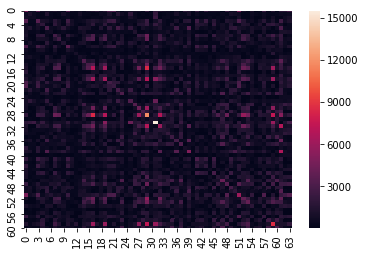

In [0]:
import seaborn as sns
a = tf.image.convert_image_dtype(style_targets['block1_conv1'], tf.float32)
sns.heatmap(a.numpy()[0,:,:])

* A ce stade, nous avons beaucoup avancé, testons si tout est okay en définissant un entrainement très simple via ce code : 

```
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs, 1e-2, 1e4)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))
  

image = tf.Variable(content_image)
  
train_step(image)
train_step(image)
train_step(image)
plt.imshow(image.read_value()[0])
```

NB : `@tf.function()` est un décorateur qui permet de faire fonctionner plus rapidement des fonctions python sur Tensorflow. Vous pouvez regarder plus de détails sur cette page : 

[Tf Function and Autograph](https://www.tensorflow.org/beta/tutorials/eager/tf_function)

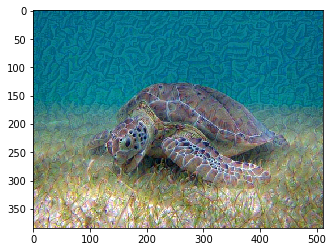

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs, 1e-2, 1e4)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))
  

image = tf.Variable(content_image)
  
train_step(image)
train_step(image)
train_step(image)
plt.imshow(image.read_value()[0])

* Tout à l'air de bien fonctionner, voyons ce que cela produit si nous faisons un entrainement plus long sur 10 epochs avec 100 steps par epochs. 

....................................................................................................Total time: 18.5


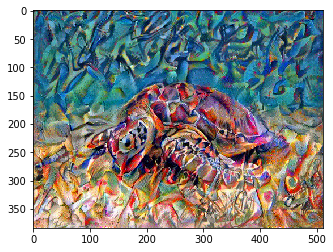

In [0]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 10

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')

plt.imshow(image.read_value()[0])
end = time.time()
print("Total time: {:.1f}".format(end-start))

Bravo !! Vous avez réussi à créer un ordinateur artiste :) 